In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib import rc, rcParams

In [3]:
# w = wanted traffic, nw = non wanted traffic, c = clients

# udp / dns : packets per second
# tcp : connections per second

bind_w100k_nw10000k_c254 = pd.read_csv('bind_w100k_nw10000k_c254.csv',sep=';')
bind_w100k_nw10000k_c254_2 = pd.read_csv('bind_w100k_nw10000k_c254-2.csv',sep=';')
udp_w100k_nw10000k_c254 = pd.read_csv('udp_testsvr_w100k_nw10000k_c254.csv',sep=';')

shmrbuf_w50k_nw_1m_c254 = pd.read_csv('exp1_1m_50k_254c.csv',sep=';')

bind_w100k_nw10000k_c254_drop = bind_w100k_nw10000k_c254[bind_w100k_nw10000k_c254['XDP_action'] == 'XDP_DROP']
bind_w100k_nw10000k_c254_pass = bind_w100k_nw10000k_c254[bind_w100k_nw10000k_c254['XDP_action'] == 'XDP_PASS']
bind_w100k_nw10000k_c254_drop_2 = bind_w100k_nw10000k_c254_2[bind_w100k_nw10000k_c254_2['XDP_action'] == 'XDP_DROP']
bind_w100k_nw10000k_c254_pass_2 = bind_w100k_nw10000k_c254_2[bind_w100k_nw10000k_c254_2['XDP_action'] == 'XDP_PASS']
udp_w100k_nw10000k_c254_drop = udp_w100k_nw10000k_c254[udp_w100k_nw10000k_c254['XDP_action'] == 'XDP_DROP']
udp_w100k_nw10000k_c254_pass = udp_w100k_nw10000k_c254[udp_w100k_nw10000k_c254['XDP_action'] == 'XDP_PASS']

simplefail2ban_w100k_nw1000k_c254 = pd.read_csv('simplefail2ban_w100k_nw1000k_c254.csv',sep=';')
simplefail2ban_w1m_nw10m_c254 = pd.read_csv('simplefail2ban_w1m_nw10m_c254.csv',sep=';')

simplefail2ban_w100k_nw1000k_c254_drop = simplefail2ban_w100k_nw1000k_c254[simplefail2ban_w100k_nw1000k_c254['XDP_action'] == 'XDP_DROP']
simplefail2ban_w100k_nw1000k_c254_pass = simplefail2ban_w100k_nw1000k_c254[simplefail2ban_w100k_nw1000k_c254['XDP_action'] == 'XDP_PASS']
simplefail2ban_w1m_nw10m_c254_drop = simplefail2ban_w1m_nw10m_c254[simplefail2ban_w1m_nw10m_c254['XDP_action'] == 'XDP_DROP']
simplefail2ban_w1m_nw10m_c254_pass = simplefail2ban_w1m_nw10m_c254[simplefail2ban_w1m_nw10m_c254['XDP_action'] == 'XDP_PASS']

shmrbuf_w50k_nw1m_c254_drop = shmrbuf_w50k_nw_1m_c254[shmrbuf_w50k_nw_1m_c254['XDP_action'] == 'XDP_DROP']
shmrbuf_w50k_nw1m_c254_pass = shmrbuf_w50k_nw_1m_c254[shmrbuf_w50k_nw_1m_c254['XDP_action'] == 'XDP_PASS']

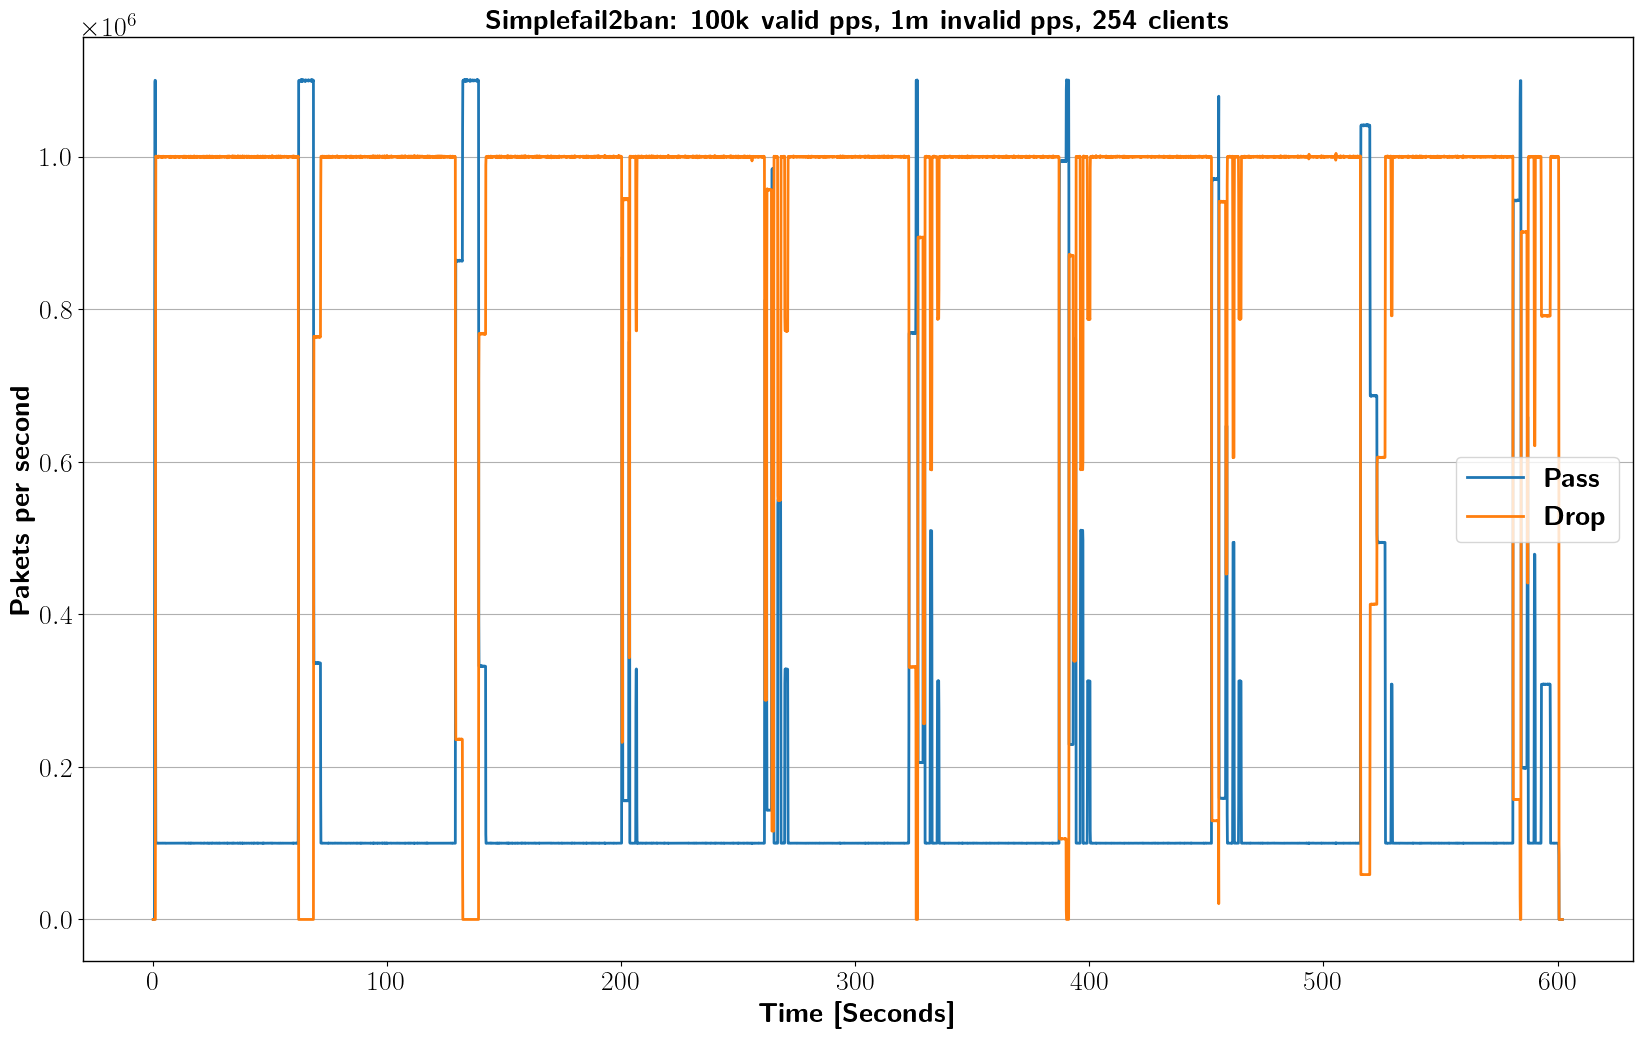

In [5]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(12)
f_size=20
rc('text', usetex=True)
rc('axes', linewidth=1)
rc('font', weight='bold')
rc('xtick', labelsize=f_size) 
rc('ytick', labelsize=f_size) 

plt.plot(simplefail2ban_w100k_nw1000k_c254_pass['time'],simplefail2ban_w100k_nw1000k_c254_pass['packets/sec'],label=r'\textbf{Pass}',linewidth=2)
plt.plot(simplefail2ban_w100k_nw1000k_c254_pass['time'],simplefail2ban_w100k_nw1000k_c254_drop['packets/sec'],label=r'\textbf{Drop}',linewidth=2)

plt.legend(fontsize=f_size)
plt.xlabel(r'\textbf{Time [Seconds]}',fontsize=f_size)
plt.ylabel(r'\textbf{Pakets per second}',fontsize=f_size)
plt.title(r'\textbf{Simplefail2ban: 100k valid pps, 1m invalid pps, 254 clients}',fontsize=f_size)
plt.grid(axis='y')
plt.savefig('simplefail2ban_w100k_nw1000k_c254.png')
plt.show()

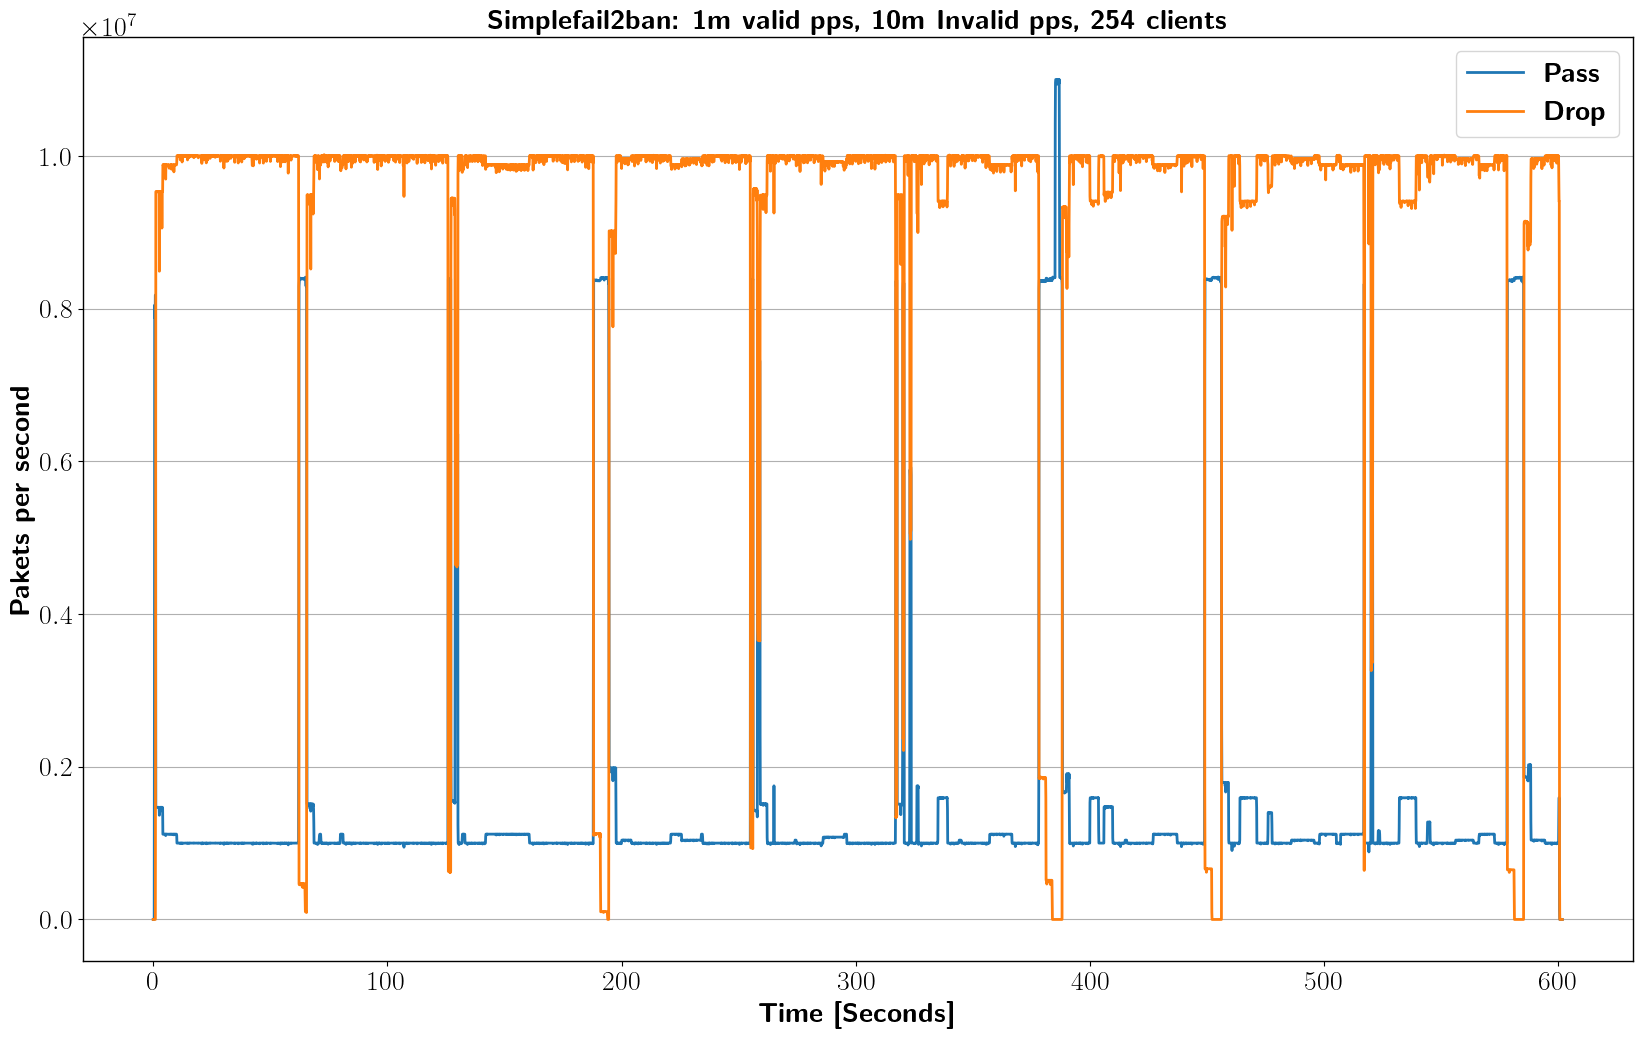

In [6]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(12)
f_size=20
rc('text', usetex=True)
rc('axes', linewidth=1)
rc('font', weight='bold')
rc('xtick', labelsize=f_size) 
rc('ytick', labelsize=f_size) 

plt.plot(simplefail2ban_w1m_nw10m_c254_pass['time'],simplefail2ban_w1m_nw10m_c254_pass['packets/sec'],label=r'\textbf{Pass}',linewidth=2)
plt.plot(simplefail2ban_w1m_nw10m_c254_pass['time'],simplefail2ban_w1m_nw10m_c254_drop['packets/sec'],label=r'\textbf{Drop}',linewidth=2)

plt.legend(fontsize=f_size)
plt.xlabel(r'\textbf{Time [Seconds]}',fontsize=f_size)
plt.ylabel(r'\textbf{Pakets per second}',fontsize=f_size)
plt.title(r'\textbf{Simplefail2ban: 1m valid pps, 10m Invalid pps, 254 clients}',fontsize=f_size)
plt.grid(axis='y')
plt.savefig('simplefail2ban_w1m_nw10m_c254.png')
plt.show()

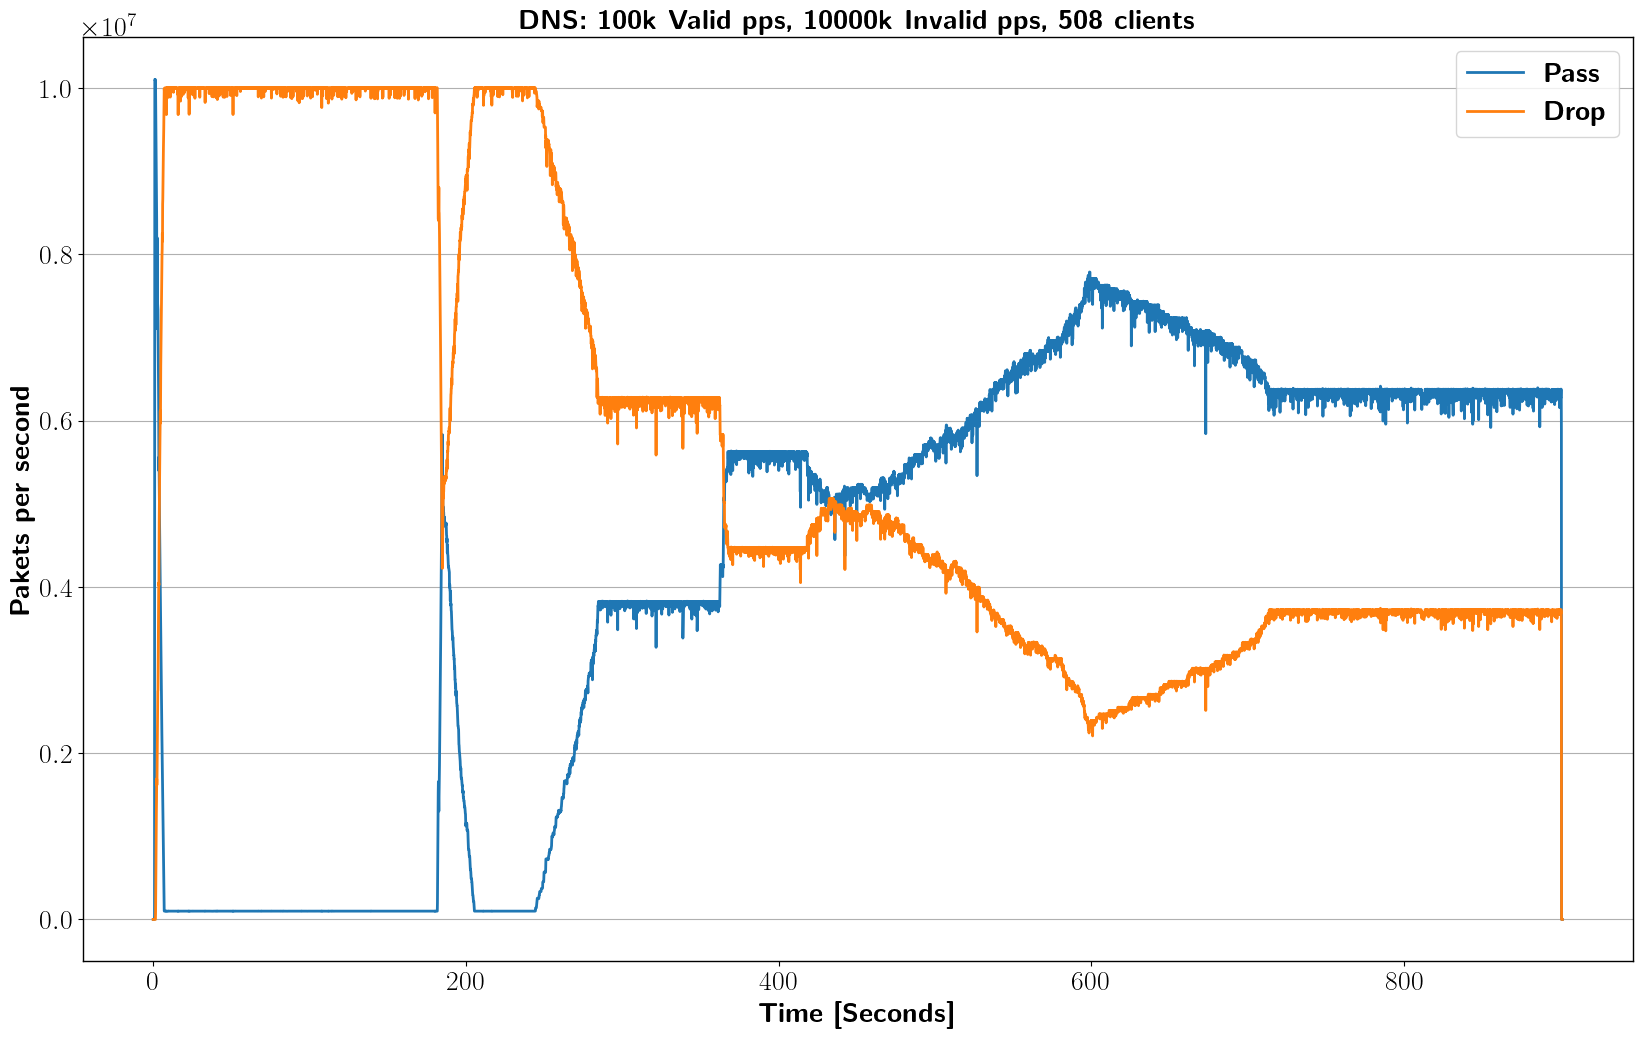

In [7]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(12)
f_size=20
rc('text', usetex=True)
rc('axes', linewidth=1)
rc('font', weight='bold')
rc('xtick', labelsize=f_size) 
rc('ytick', labelsize=f_size) 

plt.plot(bind_w100k_nw10000k_c254_pass['time'],bind_w100k_nw10000k_c254_pass['packets/sec'],label=r'\textbf{Pass}',linewidth=2)
plt.plot(bind_w100k_nw10000k_c254_pass['time'],bind_w100k_nw10000k_c254_drop['packets/sec'],label=r'\textbf{Drop}',linewidth=2)

plt.legend(fontsize=f_size)
plt.xlabel(r'\textbf{Time [Seconds]}',fontsize=f_size)
plt.ylabel(r'\textbf{Pakets per second}',fontsize=f_size)
plt.title(r'\textbf{DNS: 100k Valid pps, 10000k Invalid pps, 508 clients}',fontsize=f_size)
plt.grid(axis='y')
plt.savefig('bind_w100k_nw10000k_c254.png')
plt.show()

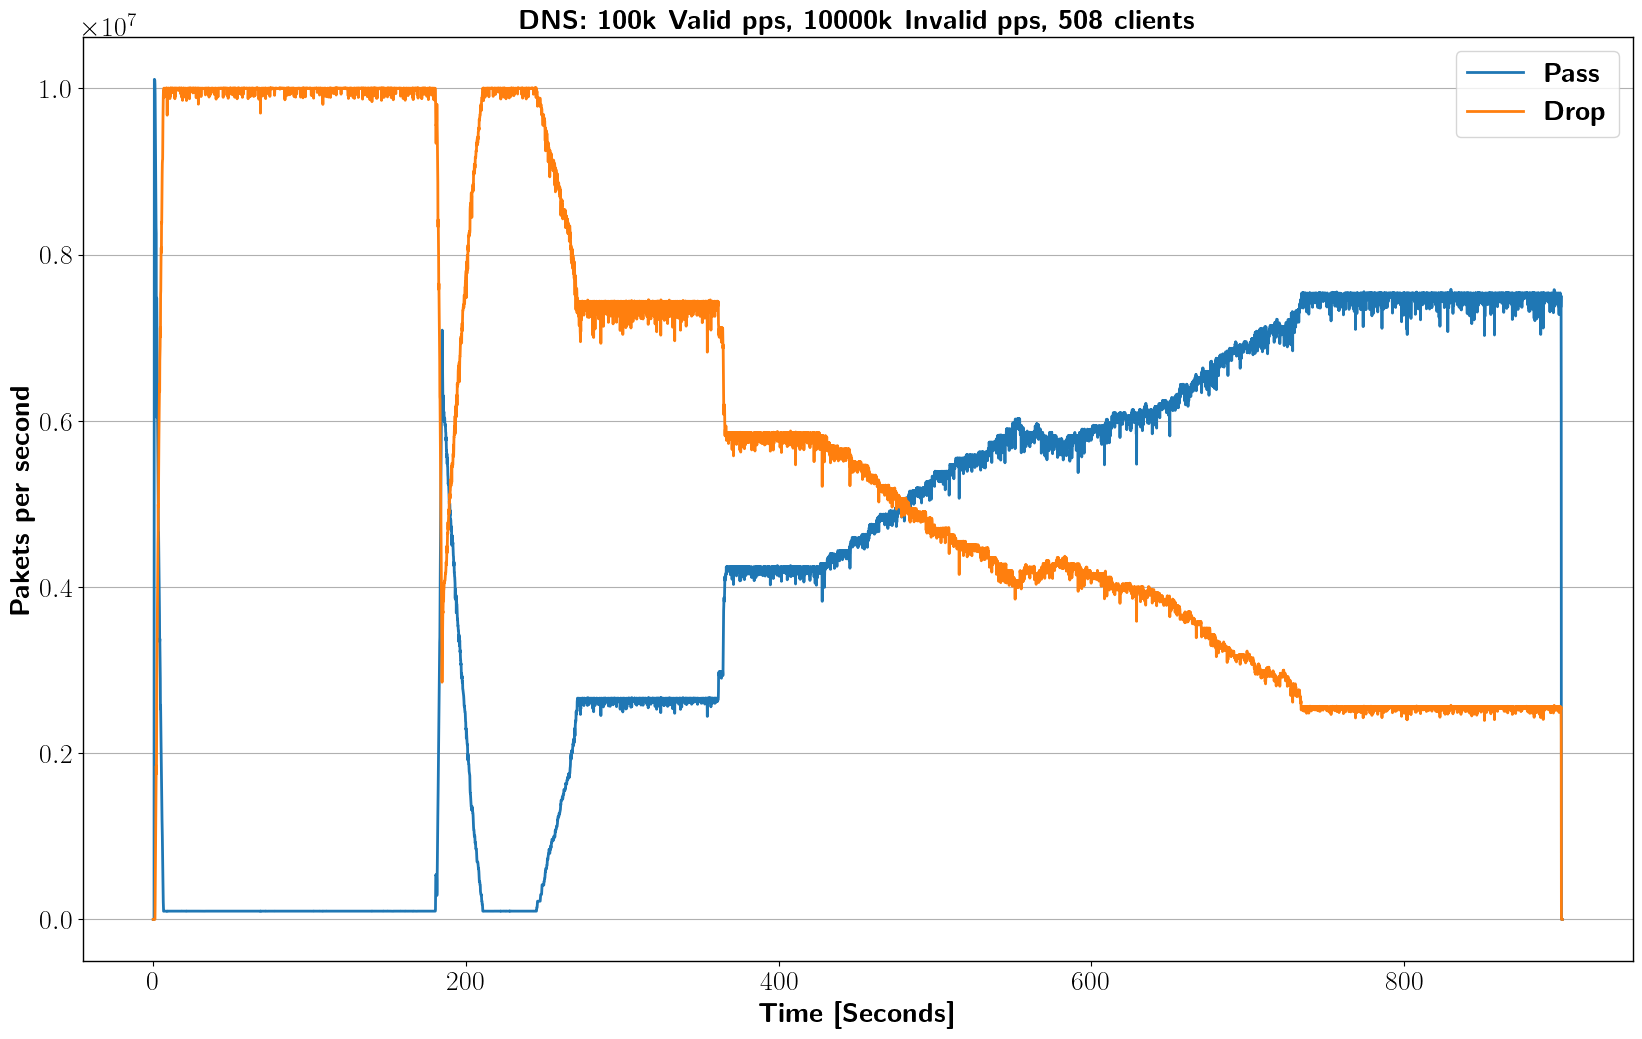

In [11]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(12)
f_size=20
rc('text', usetex=True)
rc('axes', linewidth=1)
rc('font', weight='bold')
rc('xtick', labelsize=f_size) 
rc('ytick', labelsize=f_size) 

plt.plot(bind_w100k_nw10000k_c254_pass_2['time'],bind_w100k_nw10000k_c254_pass_2['packets/sec'],label=r'\textbf{Pass}',linewidth=2)
plt.plot(bind_w100k_nw10000k_c254_pass_2['time'],bind_w100k_nw10000k_c254_drop_2['packets/sec'],label=r'\textbf{Drop}',linewidth=2)

plt.legend(fontsize=f_size)
plt.xlabel(r'\textbf{Time [Seconds]}',fontsize=f_size)
plt.ylabel(r'\textbf{Pakets per second}',fontsize=f_size)
plt.title(r'\textbf{DNS: 100k Valid pps, 10000k Invalid pps, 508 clients}',fontsize=f_size)
plt.grid(axis='y')
plt.savefig('bind2_w100k_nw10000k_c254.png')
plt.show()

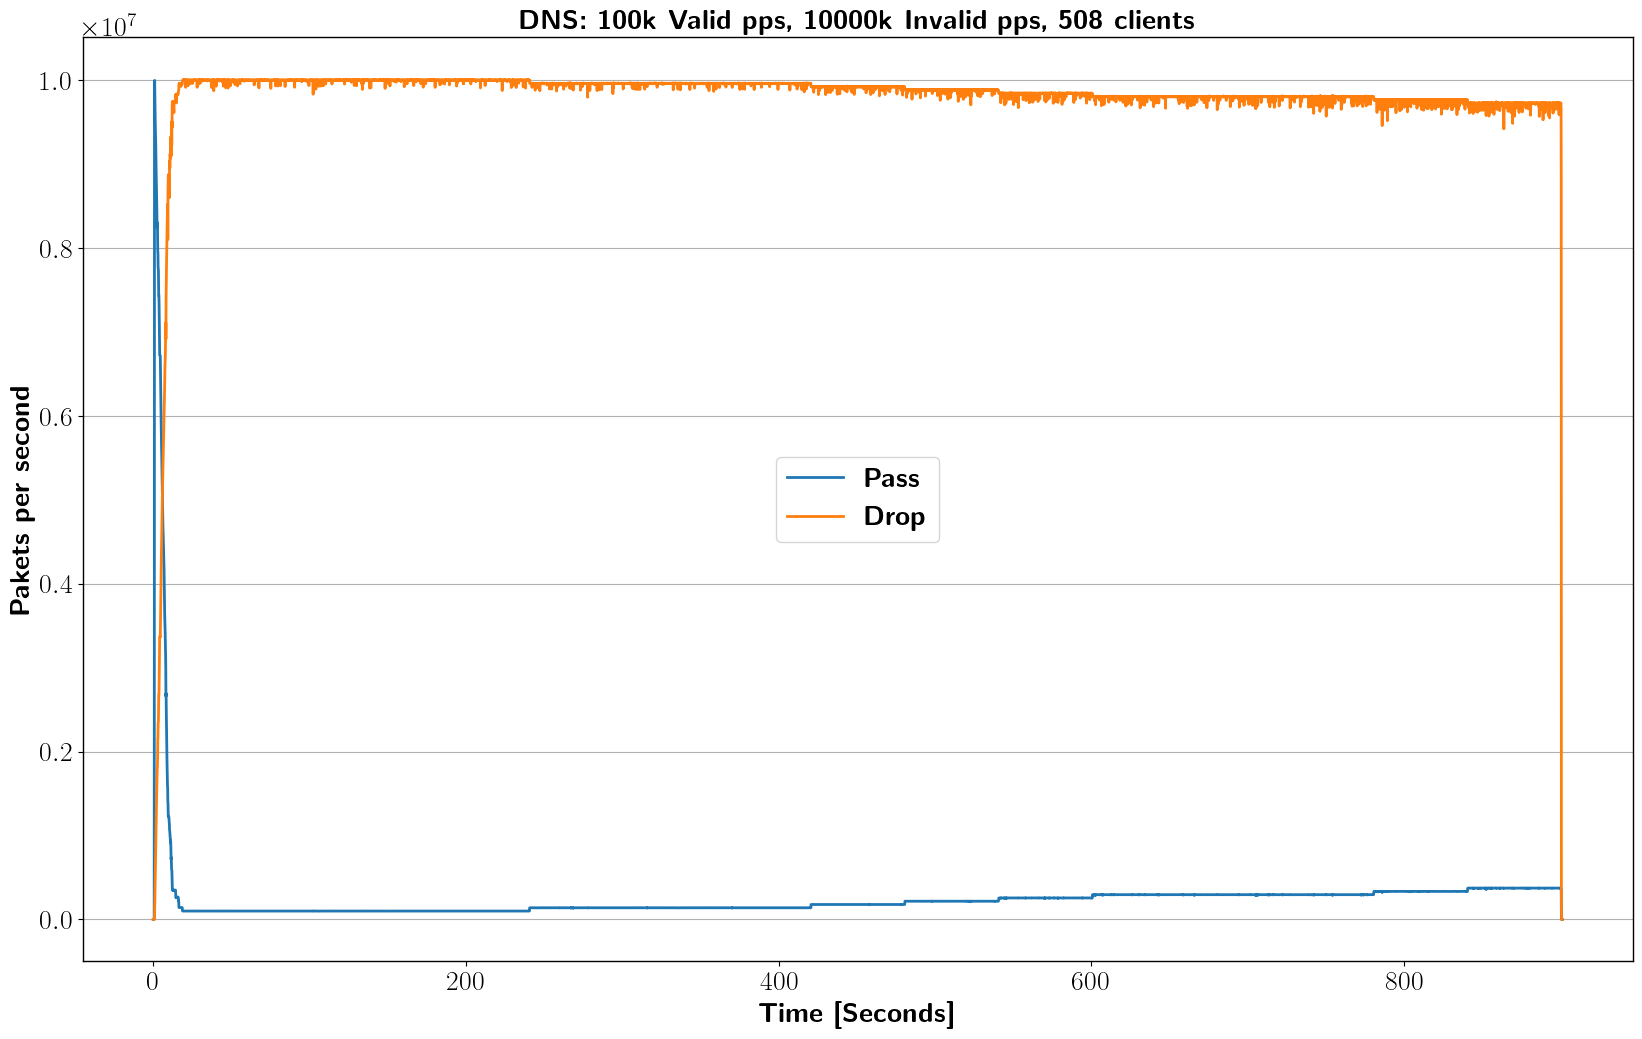

In [12]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(12)
f_size=20
rc('text', usetex=True)
rc('axes', linewidth=1)
rc('font', weight='bold')
rc('xtick', labelsize=f_size) 
rc('ytick', labelsize=f_size) 

plt.plot(udp_w100k_nw10000k_c254_pass['time'],udp_w100k_nw10000k_c254_pass['packets/sec'],label=r'\textbf{Pass}',linewidth=2)
plt.plot(udp_w100k_nw10000k_c254_pass['time'],udp_w100k_nw10000k_c254_drop['packets/sec'],label=r'\textbf{Drop}',linewidth=2)

plt.legend(fontsize=f_size)
plt.xlabel(r'\textbf{Time [Seconds]}',fontsize=f_size)
plt.ylabel(r'\textbf{Pakets per second}',fontsize=f_size)
plt.title(r'\textbf{DNS: 100k Valid pps, 10000k Invalid pps, 508 clients}',fontsize=f_size)
plt.grid(axis='y')
plt.savefig('udpsvr_w100k_nw10000k_c254.png')
plt.show()

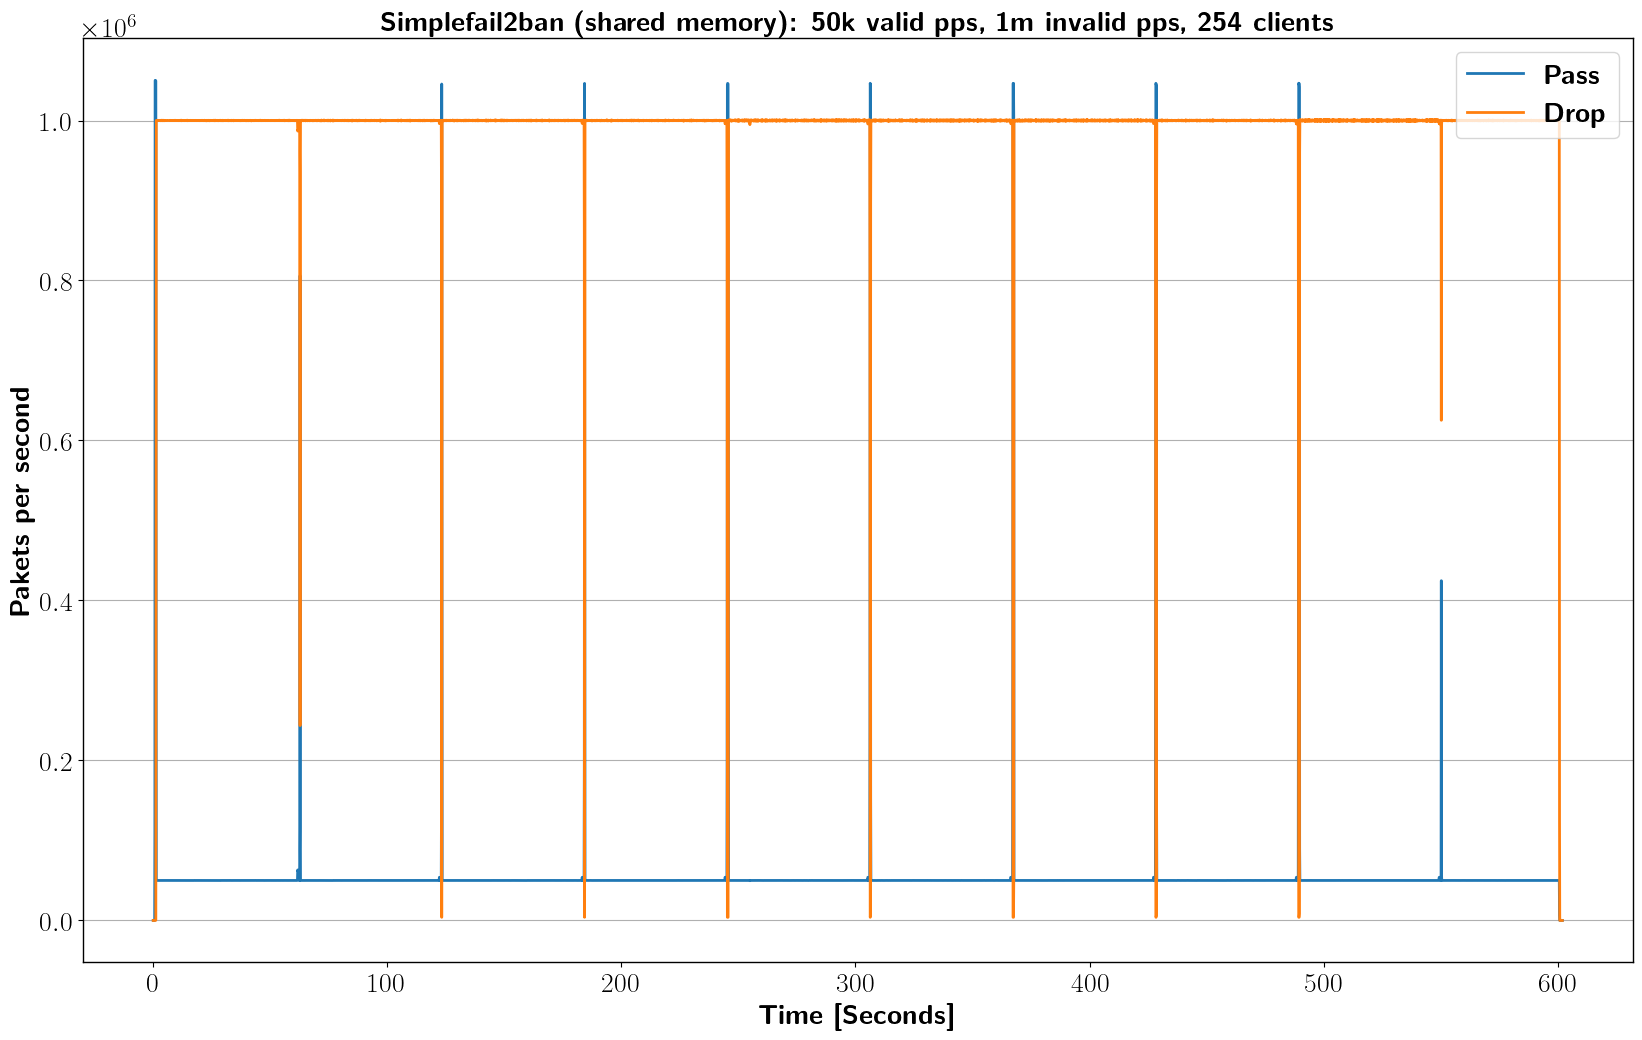

In [9]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(12)
f_size=20
rc('text', usetex=True)
rc('axes', linewidth=1)
rc('font', weight='bold')
rc('xtick', labelsize=f_size) 
rc('ytick', labelsize=f_size) 

plt.plot(shmrbuf_w50k_nw1m_c254_pass['time'],shmrbuf_w50k_nw1m_c254_pass['packets/sec'],label=r'\textbf{Pass}',linewidth=2)
plt.plot(shmrbuf_w50k_nw1m_c254_pass['time'],shmrbuf_w50k_nw1m_c254_drop['packets/sec'],label=r'\textbf{Drop}',linewidth=2)

plt.legend(fontsize=f_size,loc="upper right")
plt.xlabel(r'\textbf{Time [Seconds]}',fontsize=f_size)
plt.ylabel(r'\textbf{Pakets per second}',fontsize=f_size)
plt.title(r'\textbf{Simplefail2ban (shared memory): 50k valid pps, 1m invalid pps, 254 clients}',fontsize=f_size)
plt.grid(axis='y')
plt.savefig('simplefai2ban_shrbuf_w50k_nw1m_c254.png')
plt.show()